In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import rapidfuzz

ModuleNotFoundError: No module named 'rapidfuzz'

In [9]:
from rapidfuzz import levenshtein


ModuleNotFoundError: No module named 'rapidfuzz'

In [5]:
pip show Levenshtein


Note: you may need to restart the kernel to use updated packages.


In [232]:
df1=pd.read_csv("/Users/corentinpla/Documents/Statap/transactions_A.csv")
df2=pd.read_csv("/Users/corentinpla/Documents/Statap/transactions_B.csv")

In [233]:
df1=df1.drop(['tx_id','is_alert_solo','is_alert_pooled'],axis=1)
df2=df2.drop(['tx_id','is_alert_solo','is_alert_pooled'],axis=1)

In [234]:
df1["sender_zip_code"]=df1["sender_zip_code"].apply(lambda x:str(x))
df1["sender_account_id"]=df1["sender_account_id"].apply(lambda x:str(x))
df1["receiver_account_id"]=df1["receiver_account_id"].apply(lambda x:str(x))
df1["receiver_zip_code"]=df1["receiver_zip_code"].apply(lambda x:str(x))
df1["tx_amount"]=df1["tx_amount"].apply(lambda x:str(x))

df2["sender_zip_code"]=df2["sender_zip_code"].apply(lambda x:str(x))
df2["sender_account_id"]=df2["sender_account_id"].apply(lambda x:str(x))
df2["receiver_account_id"]=df2["receiver_account_id"].apply(lambda x:str(x))
df2["receiver_zip_code"]=df2["receiver_zip_code"].apply(lambda x:str(x))
df2["tx_amount"]=df2["tx_amount"].apply(lambda x:str(x))

In [235]:
df1_bis=df1.copy()
df2_bis=df2.copy()

In [236]:
df1_bis.dtypes

sender_account_id        object
receiver_account_id      object
tx_amount                object
timestamp                object
tx_type                  object
sender_bank_id           object
sender_first_name        object
sender_last_name         object
sender_country_code      object
sender_birth_date        object
sender_zip_code          object
receiver_bank_id         object
receiver_first_name      object
receiver_last_name       object
receiver_country_code    object
receiver_birth_date      object
receiver_zip_code        object
dtype: object

In [237]:
def levenshtein(seq1, seq2):
    seq1=str(seq1)
    seq2=str(seq2)
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    return (matrix[size_x - 1, size_y - 1])


In [238]:
def pivot(piv,df_A,df_B):
    L_df=[]
    L_A=df_A[piv].drop_duplicates()
    L_B=df_B[piv].drop_duplicates()
    L_piv=list(set(L_A) & set(L_B))


    for x in  (L_piv):
        df_A_piv=df_A[df_A[piv]==x]
        df_B_piv=df_B[df_B[piv]==x]
        L_df.append((df_A_piv,df_B_piv))
    
    return (L_df)



In [174]:
#dfA et dfB sont déjà des sub dataframes 
def get_string(dfA,dfB,pivot):
    dfA=dfA.drop(pivot,axis=1)
    dfB=dfB.drop(pivot,axis=1)
    n=len(dfA.columns)
    dfA["s"]=dfA[dfA.columns[0]]
    dfB["s"]=dfB[dfB.columns[0]]

    for k in range  (1,n) :
        dfA["s"]=dfA["s"]+dfA[dfA.columns[k]]
        dfB["s"]=dfB["s"]+dfB[dfB.columns[k]]
    
    return(dfA,dfB)
    


In [240]:
#dfA et dfB sub dataframes qui ont la colonne s
def get_distance_levenstein(dfA,dfB,rowA,rowB):
    sA=dfA.at[rowA,"s"]
    sB=dfB.at[rowB,"s"]
    return(levenshtein(sA,sB))
    

In [287]:
def get_min_levenstein(dfA,dfB,rowA):
    min =get_distance_levenstein(dfA,dfB,rowA,0)
    dist=0
    ind=0
    for y in dfB.index :
        dist =get_distance_levenstein(dfA,dfB,rowA,y)
        if dist <min :
            min=dist 
            ind=y
        
    return(ind,dist)
        



In [159]:
#Execution finale 
#création de la colonns string

In [242]:
#liste des pivots 
L_pivot=pivot("sender_last_name",df1_bis,df2_bis)

In [279]:
#subliste des pivots 
L_pivot_pivot=[]
for k in range (len(L_pivot)):
    L_pivot_pivot=L_pivot_pivot+pivot("sender_first_name",L_pivot[k][0],L_pivot[k][1])


In [283]:
L_pivot_pivot[k][0].head()

,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,sender_birth_date,sender_zip_code,receiver_bank_id,receiver_first_name,receiver_last_name,receiver_country_code,receiver_birth_date,receiver_zip_code
1246,5032.0,nan,19.7,2018-03-03,CHECK,A,Herbert,Justice,FR,1945-11-19,25370,B,Jessica,Thode,FR,1924-05-06,21450
1247,5032.0,nan,19.7,2018-03-03,WIRE,A,Herbert,Justice,FR,1945-11-19,25370,C,Kathleen,Conigliaro,FR,1922-02-28,43430
1248,5032.0,nan,19.7,2018-03-03,WIRE,A,Herbert,Justice,FR,1945-11-19,25370,C,Eddie,Hernandez,FR,1928-01-27,38440
1250,5032.0,8863.0,19.7,2018-03-03,WIRE,A,Herbert,Justice,FR,1945-11-19,25370,A,Linda,Cooper,FR,1934-04-28,21450
1251,5032.0,3652.0,19.7,2018-03-03,WIRE,A,Herbert,Justice,FR,1945-11-19,25370,A,Maxine,Merriman,FR,1955-02-27,67700


In [299]:
dist=[]
for i in range (len(L_pivot_pivot)):
    df1_bis=L_pivot_pivot[i][0]
    df2_bis=L_pivot_pivot[i][1]
    print (df1_bis.shape, df2_bis.shape)
    df1_bis,df2_bis= get_string(df1_bis,df2_bis,"sender_last_name")
    print (df1_bis.shape, df2_bis.shape)
    df1_bis=df1_bis.drop(columns="sender_first_name")
    df2_bis=df2_bis.drop(columns="sender_first_name")
    df1_bis=df1_bis.reset_index()
    df2_bis=df2_bis.reset_index()
    df1_bis=df1_bis.drop(columns="index")
    df2_bis=df2_bis.drop(columns="index")
    for k in range (df1_bis.shape[0]):
        dist.append(get_min_levenstein(df1_bis,df2_bis,k))


(148, 17) (34, 17)
(148, 17) (34, 17)
(63, 17) (85, 17)
(63, 17) (85, 17)
(6, 17) (6, 17)
(6, 17) (6, 17)
(194, 17) (40, 17)
(194, 17) (40, 17)
(12, 17) (1, 17)
(12, 17) (1, 17)
(78, 17) (19, 17)
(78, 17) (19, 17)
(760, 17) (157, 17)
(760, 17) (157, 17)


KeyboardInterrupt: 

In [300]:
L_plot=[]
for k in range (len(dist)):
    L_plot.append(dist[k][1])


In [301]:
L_plot.sort()

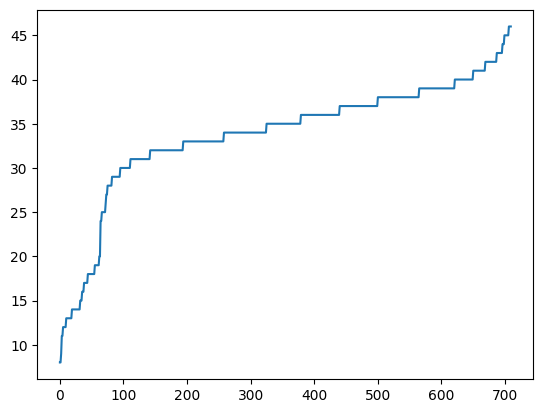

In [302]:
plt.plot(L_plot)